In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#load data
data = pd.read_csv('data_clean.csv',encoding='latin1')
data.head()

,Tweet,Affect Dimension,Tweet_lema
0,we need to do something. something must be don...,0,need something something must doneyour anxiety...
1,@Chan_lfc10 @paul_rule @Nuttall1878 @DeadlineD...,0,would fume hijacked 8m move relegate full back
2,Caleb had a nightmare about zombies.,0,caleb nightmare zombies
3,#CNN really needs to get out of the #Propagand...,0,cnn really need propaganda business 30 second ...
4,#dmme #kikme #sext #horny #ass #bbw #naught...,0,dmme kikme sext horny bbw naughty pussy kik nu...


0= anger, 1=fear, 2=joy, 3=sadness


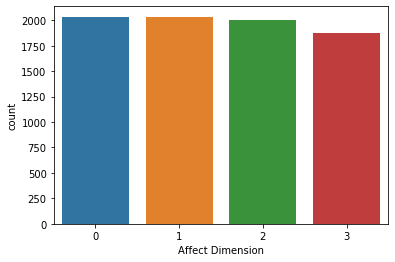

In [6]:
#plotting data to see its shape


print("0= anger, 1=fear, 2=joy, 3=sadness")
a= sns.countplot(x=data['Affect Dimension'], data=data, order= data['Affect Dimension'].value_counts().index)

plt.show()

# exploring models for comparision

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

Tfidf=TfidfVectorizer()
X= data['Tweet_lema']
y=data['Affect Dimension']

#x=Tfidf.fit_transform(X)
X = Tfidf.fit_transform(X.values.astype('U'))

In [15]:
#spliting data for test and train
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1)


In [16]:
text_clf= LinearSVC()
text_clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [17]:
pred= text_clf.predict(X_test)

In [19]:
print("Linear SVC results:")
print(classification_report(y_test,pred))

Linear SVC results:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       402
           1       0.69      0.67      0.68       428
           2       0.87      0.88      0.88       399
           3       0.56      0.60      0.58       361

    accuracy                           0.71      1590
   macro avg       0.71      0.71      0.71      1590
weighted avg       0.71      0.71      0.71      1590



In [21]:
#trying MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB()
m=clf.fit(X_train,y_train)
pred_1= clf.predict(X_test)
print("MultinomialNB results:")
print(classification_report(y_test,pred_1))

MultinomialNB results:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       402
           1       0.67      0.65      0.66       428
           2       0.86      0.84      0.85       399
           3       0.56      0.59      0.58       361

    accuracy                           0.70      1590
   macro avg       0.69      0.69      0.69      1590
weighted avg       0.70      0.70      0.70      1590



In [22]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
cl= BernoulliNB()
cl.fit(X_train,y_train)
pred1= cl.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       402
           1       0.69      0.59      0.64       428
           2       0.84      0.86      0.85       399
           3       0.55      0.52      0.54       361

    accuracy                           0.68      1590
   macro avg       0.68      0.68      0.68      1590
weighted avg       0.68      0.68      0.68      1590



In [23]:
#to select the best fit svc model
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf','poly'],
             'degree':[1,2]} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.306, total=   3.7s
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.290, total=   3.7s
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.306, total=   3.7s
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.309, total=   3.8s
[CV] C=0.1, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=1, gamma=1, kernel=rbf, score=0.306, total=   3.8s
[CV] C=0.1, degree=1, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=1, gamma=1, kernel=poly, score=0.554, total=   3.6s
[CV] C=0.1, degree=1, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=1, gamma=1, kernel=poly, score=0.579, total=   3.6s
[CV] C=0.1, degree=1, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=1, gamma=1, kernel=poly, score=0.566, total=   3.6s
[CV] C=0.1, degree=1, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=1, gamma=1, kernel=poly, score=0.570, total=   3.6s
[CV] C=0.1, degree=1, gamma=1, kernel=poly ...........................
[C

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 30.6min finished


{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [24]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       402
           1       0.69      0.68      0.68       428
           2       0.89      0.83      0.86       399
           3       0.56      0.65      0.60       361

    accuracy                           0.71      1590
   macro avg       0.72      0.71      0.71      1590
weighted avg       0.72      0.71      0.71      1590



In [25]:
from sklearn import svm
svc = svm.SVC(C=1, degree= 1, gamma= 1, kernel= 'poly').fit(X_train,y_train)
pred_2= svc.predict(X_test)
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       402
           1       0.69      0.68      0.68       428
           2       0.89      0.83      0.86       399
           3       0.56      0.65      0.60       361

    accuracy                           0.71      1590
   macro avg       0.72      0.71      0.71      1590
weighted avg       0.72      0.71      0.71      1590



In [26]:
#merge two algos
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('svm',svc))
estimator.append(('nb',m))
essemble=VotingClassifier(estimator)
essemble.fit(X_train,y_train)
predict= essemble.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       402
           1       0.66      0.67      0.67       428
           2       0.88      0.81      0.84       399
           3       0.60      0.56      0.58       361

    accuracy                           0.70      1590
   macro avg       0.70      0.70      0.70      1590
weighted avg       0.70      0.70      0.70      1590



# As svm gives the best results of all, we will use that for further predictions